REPEAT AT =  9
REPEAT AT =  17
REPEAT AT =  23
[0.81, 4.41, 8.13, 1.2, 0.63, 1.84, 9.52, 4.17, 2.74, 1.84, 12.36, 7.89, 0.39, 3.72, 2.07, 2.15, 2.65, 1.2, 6.12, 14.28, 0.05, 5.06, 13.56, 12.36, 8.38]
[1.84, 10.02, 18.47, 2.72, 1.42, 4.18, 21.62, 9.47, 6.23, 4.18, 28.09, 17.93, 0.89, 8.46, 4.71, 4.89, 6.03, 2.72, 13.9, 32.44, 0.12, 11.49, 30.81, 28.09, 19.04]


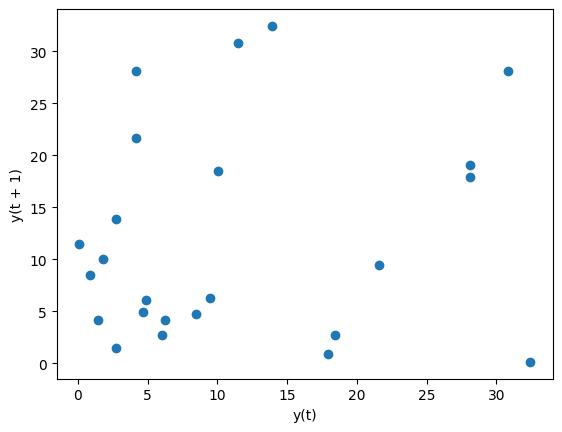

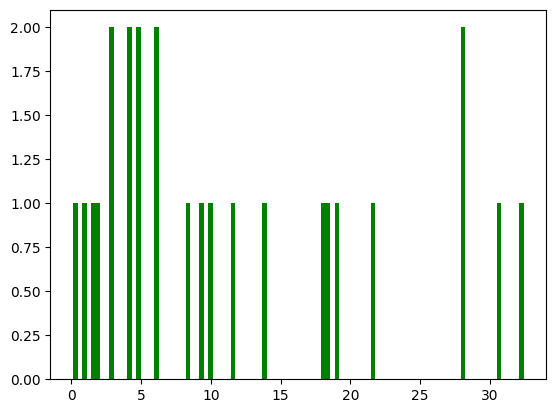

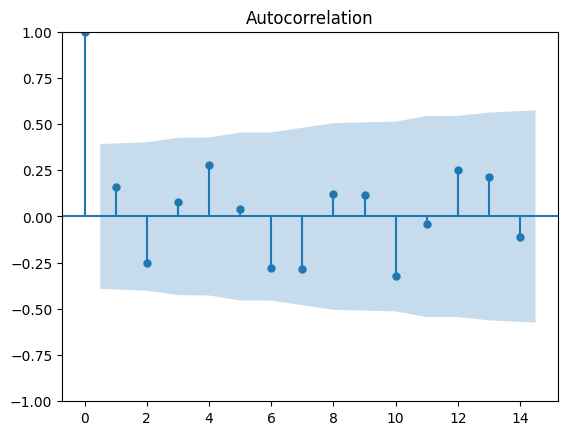

In [14]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

def linearCongruentialMethod(p_seed, p_m, p_a, p_c, p_noOfRandomNums, p_precision):
    p_randomNums = []
    p_already_seen = [-1] * (p_noOfRandomNums)
    p_temp = ((p_seed * p_a) + p_c) % p_m
    p_randomNums.append(round(p_temp / p_m, p_precision))
    for i in range(1, p_noOfRandomNums):
        p_temp = ((p_temp * p_a) + p_c) % p_m
        p_randomNums.append(round(p_temp / p_m, p_precision))
        if p_randomNums[i] not in p_already_seen:
            p_already_seen[i] = p_randomNums[i]
        else:
            print("REPEAT AT = ", i)
            # break
    return p_randomNums

def inversTransformation(randomNums, precision, b):
    inverse_variate = []
    for i in range(0, len(randomNums), 1):
        x = -b * np.log(1 - randomNums[i])
        inverse_variate.append(round(x, precision))
        # print(inverse_variate[i])
    return inverse_variate

# 122
seed = 122
m = 2**16 + 1    # Modulus parameter
a = 75        # Multiplier term
c = 74        # Increment term
precision = 2
noOfRandomNums = 25
randomNums = linearCongruentialMethod(seed, m, a, c, noOfRandomNums, precision)
for i in range(0, randomNums.__len__(), 1):
    # print(randomNums[i])
    pass

# randomNums = np.random.exponential(size=25)
# print(randomNums)
beta_kedatangan = inversTransformation(randomNums, precision, 5.37)
beta_service = inversTransformation(randomNums, precision, 12.2)

print(beta_kedatangan)
print(beta_service)

# print("INVERSEEEE")
data_lcg = pd.DataFrame(beta_kedatangan)
data_lcg.to_csv("beta_kedatangan_2.csv")
data_lcg = pd.DataFrame(beta_service)
data_lcg.to_csv("beta_service_2.csv")
pd.plotting.lag_plot(data_lcg)      # ScatterPlot
plt.show()
plt.hist(data_lcg, bins=100, color="green")                  # Histogram
plot_acf(data_lcg)                  # AutoCorrelation
plt.show()


In [101]:
server_status = 0
number_in_queue = 0
time_last_event = 0

number_delayed = 0
time_delayed = 0
cutie = 0
beauty = 0

# arr_a = [81, 441, 813, 120, 63]
# arr_d = [184, 1002, 1847, 272, 142]
# arr_a = [176, 231, 140, 341, 5, 22, 612, 595, 107, 520]
# arr_d = [802, 1051, 638, 1549, 25, 100, 2780, 2705, 484, 2361]
# arr_a = [176, 231, 140, 341, 5]
# arr_d = [802, 1051, 638, 1549, 25]
arr_a = [81, 441, 813, 120, 63]
arr_d = [368, 2003, 3694, 544, 284]

event_list = [arr_a[0], -1]
arrival_time = [arr_a[0]]
departure_time = []

in_service = -1
in_queue = []

event_log_type = []
event_log_time = []
queue_log = []
server_status_log = []
number_delayed_log = []
time_delayed_log = []
cutie_log = []
beauty_log = []

dn = 0
qn = 0
tn = 0
un = 0

def printInfo():
        # print("time_last_event : ", time_last_event)
        # print("server_status : ", server_status)
        # print("event_list : ", event_list)
        # print("in_service : ", in_service)
        # print("in_queue : ", in_queue)
        # print("number_in_queue : ", number_in_queue)
        # print("number_delayed : ", number_delayed)
        # print("time_delayed : ", time_delayed)
        # print("cutie : ", cutie)
        # print("beauty : ", beauty)
        # print("server_status_log : ", server_status_log)
        # print("number_delayed_log : ", number_delayed_log)
        # print("time_delayed_log : ", time_delayed_log)
        # print("queue_log : ", queue_log)
        # print("cutie_log : ", cutie_log)
        # print("beauty_log : ", beauty_log)
        # print("arrival_time : ", arrival_time)
        # print("departure_time : ", departure_time)
        print()
        
clock_duration = 20000
clock_tick = 1
for clock in range(0, clock_duration, clock_tick):
    if (clock == event_list[0]):
        print("\n@ Arrival event ", len(arrival_time), " at clock = ", clock)
        if (len(arrival_time) < len(arr_a)):
            if (server_status):
                in_queue.append(clock)

                beauty = clock - time_last_event
                beauty_log.append(beauty_log[len(beauty_log) - 1] + beauty)

            else:
                server_status = 1
                in_service = clock
                event_list[1] = clock + arr_d[len(departure_time)]
                departure_time.append(arr_d[len(departure_time)])

                number_delayed += 1
                beauty_log.append(beauty)

            event_list[0] = clock + arr_a[len(arrival_time)]
            arrival_time.append(arr_a[len(arrival_time)])
            number_delayed_log.append(number_delayed)
        elif (len(arrival_time) == len(arr_a)):
            if (server_status):
                in_queue.append(clock)
                beauty = clock - time_last_event
                beauty_log.append(beauty_log[len(beauty_log) - 1] + beauty)
            else:
                server_status = 1
                in_service = clock

            number_delayed_log.append(number_delayed)
            

        time_delayed_log.append(time_delayed)
        number_in_queue = len(in_queue)
        time_last_event = clock

        cutie = 0
        if (len(in_queue) > 0):
            for person in in_queue:
                cutie += clock - person
        cutie_log.append(cutie + time_delayed)
        
        printInfo()
        server_status_log.append(server_status)
        event_log_time.append(clock)
        event_log_type.append('A')
        queue_log.append(len(in_queue))
    
    if (clock == event_list[1]):
        print("\n& Departure event ", len(departure_time), " at clock = ", clock)
        if (len(in_queue) == 0):
            in_service = -1
            server_status = 0
            event_list[1] = -1

            number_delayed_log.append(number_delayed)
        else:
            in_service = in_queue.pop(0)
            event_list[1] = clock + arr_d[len(departure_time)]
            departure_time.append(arr_d[len(departure_time)])

            number_delayed += 1
            number_delayed_log.append(number_delayed)
            time_delayed += clock - in_service

        beauty = clock - time_last_event
        beauty_log.append(beauty_log[len(beauty_log) - 1] + beauty)
        number_in_queue = len(in_queue)
        time_last_event = clock
        
        cutie = 0
        for person in in_queue:
            cutie += clock - person
        cutie_log.append(cutie + time_delayed)

        printInfo()
        server_status_log.append(server_status)
        event_log_time.append(clock)
        event_log_type.append('D')
        queue_log.append(len(in_queue))
        time_delayed_log.append(time_delayed)

dn = (time_delayed / number_delayed)
qn = cutie_log[len(cutie_log) - 1] / event_log_time[len(event_log_time) - 1]
tn = (beauty_log[len(beauty_log) - 1])
un = tn / event_log_time[len(event_log_time) - 1]

print("arr_a : ", arr_a)
print("arr_d : ", arr_d)

print("\n80====================LOG====================085")
print("event_log_type \t\t", len(event_log_type), ": ", event_log_type)
print("event_log_time \t\t", len(event_log_time), ": ", event_log_time)
print("queue_log \t\t", len(queue_log), ": ", queue_log)
print("server_status_log \t", len(server_status_log), ": ", server_status_log)
print("number_delayed \t\t", len(number_delayed_log), ": ", number_delayed_log)
print("time_delayed \t\t", len(time_delayed_log), ": ", time_delayed_log)
print("cutie \t\t\t", len(cutie_log), ": ", cutie_log)
print("beauty \t\t\t", len(beauty_log), ": ", beauty_log)

print("\n8====================Juicy Stats for Nerds====================D")
print("dn (Average Delay in minute)\t\t : ", dn / 100)
print("qn (Average Number of ppl in queue)\t : ", qn)
print("tn (Server busy in minute)\t\t : ", tn / 100)
print("un (Server busy percentage)\t\t : ", un)

# arr_a = [81, 441, 813, 120, 63]
# arr_d = [184, 1002, 1847, 272, 142]


@ Arrival event  1  at clock =  81


& Departure event  1  at clock =  449


@ Arrival event  2  at clock =  522


@ Arrival event  3  at clock =  1335


@ Arrival event  4  at clock =  1455


@ Arrival event  5  at clock =  1518


& Departure event  2  at clock =  2525


& Departure event  3  at clock =  6219


& Departure event  4  at clock =  6763


& Departure event  5  at clock =  7047

arr_a :  [81, 441, 813, 120, 63]
arr_d :  [368, 2003, 3694, 544, 284]

80====================LOG====================085
event_log_type 		 10 :  ['A', 'D', 'A', 'A', 'A', 'A', 'D', 'D', 'D', 'D']
event_log_time 		 10 :  [81, 449, 522, 1335, 1455, 1518, 2525, 6219, 6763, 7047]
queue_log 		 10 :  [0, 0, 0, 1, 2, 3, 2, 1, 0, 0]
server_status_log 	 10 :  [1, 0, 1, 1, 1, 1, 1, 1, 1, 0]
number_delayed 		 10 :  [1, 1, 2, 2, 2, 2, 3, 4, 5, 5]
time_delayed 		 10 :  [0, 0, 0, 0, 0, 0, 1190, 5954, 11199, 11199]
cutie 			 10 :  [0, 0, 0, 0, 120, 246, 3267, 10655, 11199, 11199]
beauty 			 10 :  [0, 368, 368, 11

In [ ]:
import numpy as np

def linearCongruentialMethod(p_seed, p_noOfRandomNums, p_precision):
    p_m = 2**16 + 1    # Modulus parameter
    p_a = 75        # Multiplier term
    p_c = 74        # Increment term
    p_temp = p_seed
    p_randomNums = []
    for i in range(0, p_noOfRandomNums):
        p_temp = ((p_temp * p_a) + p_c) % p_m
        if (round(p_temp / p_m, p_precision) == 0):
            print(0, i)
            p_randomNums.append(0.01)
        elif (round(p_temp / p_m, p_precision) == 1):
            print(1, i)
            p_randomNums.append(0.99)
        else:
            p_randomNums.append(round(p_temp / p_m, p_precision))
            
    return p_randomNums

def inversTransformation(randomNums, precision, b):
    inverse_variate = []
    for i in range(0, len(randomNums), 1):
        x = -b * np.log(1 - randomNums[i])
        inverse_variate.append(round(x, precision))
        # print(inverse_variate[i])
    return inverse_variate

def calculateQueue(arr_a, arr_d):
    lifespan = 0
    for i in range(len(arr_d)):
        arr_a[i] = int(arr_a[i] * 100)
        lifespan += arr_a[i]
    for i in range(len(arr_d)):
        arr_d[i] = int(arr_d[i] * 100)
        lifespan += arr_d[i]

    server_status = 0
    number_in_queue = 0
    time_last_event = 0

    number_delayed = 0
    time_delayed = 0
    cutie = 0
    beauty = 0

    event_list = [arr_a[0], -1]
    arrival_time = [arr_a[0]]
    departure_time = []

    in_service = -1
    in_queue = []

    event_log_type = []
    event_log_time = []
    queue_log = []
    server_status_log = []
    number_delayed_log = []
    time_delayed_log = []
    cutie_log = []
    beauty_log = []

    dn = 0
    qn = 0
    tn = 0
    un = 0

    def printInfo():
            # print("time_last_event : ", time_last_event)
            # print("server_status : ", server_status)
            # print("event_list : ", event_list)
            # print("in_service : ", in_service)
            # print("in_queue : ", in_queue)
            # print("number_in_queue : ", number_in_queue)
            # print("number_delayed : ", number_delayed)
            # print("time_delayed : ", time_delayed)
            # print("cutie : ", cutie)
            # print("beauty : ", beauty)
            # print("server_status_log : ", server_status_log)
            # print("number_delayed_log : ", number_delayed_log)
            # print("time_delayed_log : ", time_delayed_log)
            # print("queue_log : ", queue_log)
            # print("cutie_log : ", cutie_log)
            # print("beauty_log : ", beauty_log)
            # print("arrival_time : ", arrival_time)
            # print("departure_time : ", departure_time)
            # print()
            mama = 1
            
    clock_duration = int(lifespan)
    clock_tick = 1
    for clock in range(0, clock_duration, clock_tick):
        if (clock == event_list[0]):
            # print("\n@ Arrival event ", len(arrival_time), " at clock = ", clock)
            if (len(arrival_time) < len(arr_a)):
                if (server_status):
                    in_queue.append(clock)

                    beauty = clock - time_last_event
                    beauty_log.append(beauty_log[len(beauty_log) - 1] + beauty)

                else:
                    server_status = 1
                    in_service = clock
                    event_list[1] = clock + arr_d[len(departure_time)]
                    departure_time.append(arr_d[len(departure_time)])

                    number_delayed += 1
                    beauty_log.append(beauty)

                event_list[0] = clock + arr_a[len(arrival_time)]
                arrival_time.append(arr_a[len(arrival_time)])
                number_delayed_log.append(number_delayed)
            elif (len(arrival_time) == len(arr_a)):
                if (server_status):
                    in_queue.append(clock)
                    beauty = clock - time_last_event
                    beauty_log.append(beauty_log[len(beauty_log) - 1] + beauty)
                else:
                    server_status = 1
                    in_service = clock

                number_delayed_log.append(number_delayed)
                

            time_delayed_log.append(time_delayed)
            number_in_queue = len(in_queue)
            time_last_event = clock

            cutie = 0
            if (len(in_queue) > 0):
                for person in in_queue:
                    cutie += clock - person
            cutie_log.append(cutie + time_delayed)
            
            printInfo()
            server_status_log.append(server_status)
            event_log_time.append(clock)
            event_log_type.append('A')
            queue_log.append(len(in_queue))
        
        if (clock == event_list[1]):
            # print("\n& Departure event ", len(departure_time), " at clock = ", clock)
            if (len(in_queue) == 0):
                in_service = -1
                server_status = 0
                event_list[1] = -1

                number_delayed_log.append(number_delayed)
            else:
                in_service = in_queue.pop(0)
                event_list[1] = clock + arr_d[len(departure_time)]
                departure_time.append(arr_d[len(departure_time)])

                number_delayed += 1
                number_delayed_log.append(number_delayed)
                time_delayed += clock - in_service

            beauty = clock - time_last_event
            beauty_log.append(beauty_log[len(beauty_log) - 1] + beauty)
            number_in_queue = len(in_queue)
            time_last_event = clock
            
            cutie = 0
            for person in in_queue:
                cutie += clock - person
            cutie_log.append(cutie + time_delayed)

            printInfo()
            server_status_log.append(server_status)
            event_log_time.append(clock)
            event_log_type.append('D')
            queue_log.append(len(in_queue))
            time_delayed_log.append(time_delayed)

    dn = (time_delayed / number_delayed)
    qn = cutie_log[len(cutie_log) - 1] / event_log_time[len(event_log_time) - 1]
    tn = (beauty_log[len(beauty_log) - 1])
    un = tn / event_log_time[len(event_log_time) - 1]
    
    print("arr_a : ", arr_a)
    print("arr_d : ", arr_d)
    print("lifespan : ", lifespan)

    print("\n80====================LOG====================085")
    print("event_log_type \t\t", len(event_log_type), ": ", event_log_type)
    print("event_log_time \t\t", len(event_log_time), ": ", event_log_time)
    print("queue_log \t\t", len(queue_log), ": ", queue_log)
    print("server_status_log \t", len(server_status_log), ": ", server_status_log)
    print("number_delayed \t\t", len(number_delayed_log), ": ", number_delayed_log)
    print("time_delayed \t\t", len(time_delayed_log), ": ", time_delayed_log)
    print("cutie \t\t\t", len(cutie_log), ": ", cutie_log)
    print("beauty \t\t\t", len(beauty_log), ": ", beauty_log)

    print("\n8====================Juicy Stats for Nerds====================D")
    print("dn (Average Delay in minute)\t\t : ", dn / 100)
    print("qn (Average Number of ppl in queue)\t : ", qn)
    print("tn (Server busy in minute)\t\t : ", tn / 100)
    print("un (Server busy percentage)\t\t : ", un)

# seed = 277
seed = np.random.randint(100000)
precision = 2
noOfRandomNums = 5
randomNums = linearCongruentialMethod(seed, noOfRandomNums, precision)
beta_kedatangan = inversTransformation(randomNums, precision, 5.372093023)
beta_service = inversTransformation(randomNums, precision, 24.4)

print(randomNums)
print(beta_kedatangan)
print(beta_service)
print(seed)
calculateQueue(beta_kedatangan, beta_service)

In [675]:
import PySimpleGUI as sg
import numpy as np

def linearCongruentialMethod(p_seed, p_noOfRandomNums, p_precision):
    p_m = 2**16 + 1    # Modulus parameter
    p_a = 75        # Multiplier term
    p_c = 74        # Increment term
    p_temp = p_seed
    p_randomNums = []
    for i in range(0, p_noOfRandomNums):
        p_temp = ((p_temp * p_a) + p_c) % p_m
        if (round(p_temp / p_m, p_precision) == 0):
            print(0, i)
            p_randomNums.append(0.01)
        elif (round(p_temp / p_m, p_precision) == 1):
            print(1, i)
            p_randomNums.append(0.99)
        else:
            p_randomNums.append(round(p_temp / p_m, p_precision))
            
    return p_randomNums

def inversTransformation(randomNums, precision, b):
    inverse_variate = []
    for i in range(0, len(randomNums), 1):
        x = -b * np.log(1 - randomNums[i])
        inverse_variate.append(round(x, precision))
        # print(inverse_variate[i])
    return inverse_variate

def calculateQueue(arr_a, arr_d):
    lifespan = 0
    for i in range(len(arr_d)):
        arr_a[i] = int(arr_a[i] * 100)
        lifespan += arr_a[i]
    for i in range(len(arr_d)):
        arr_d[i] = int(arr_d[i] * 100)
        lifespan += arr_d[i]

    server_status = 0
    number_in_queue = 0
    time_last_event = 0

    number_delayed = 0
    time_delayed = 0
    cutie = 0
    beauty = 0

    event_list = [arr_a[0], -1]
    arrival_time = [arr_a[0]]
    departure_time = []

    in_service = -1
    in_queue = []

    event_log_type = []
    event_log_time = []
    queue_log = []
    server_status_log = []
    number_delayed_log = []
    time_delayed_log = []
    cutie_log = []
    beauty_log = []

    dn = 0
    qn = 0
    tn = 0
    un = 0

    def printInfo():
            # print("time_last_event : ", time_last_event)
            # print("server_status : ", server_status)
            # print("event_list : ", event_list)
            # print("in_service : ", in_service)
            # print("in_queue : ", in_queue)
            # print("number_in_queue : ", number_in_queue)
            # print("number_delayed : ", number_delayed)
            # print("time_delayed : ", time_delayed)
            # print("cutie : ", cutie)
            # print("beauty : ", beauty)
            # print("server_status_log : ", server_status_log)
            # print("number_delayed_log : ", number_delayed_log)
            # print("time_delayed_log : ", time_delayed_log)
            # print("queue_log : ", queue_log)
            # print("cutie_log : ", cutie_log)
            # print("beauty_log : ", beauty_log)
            # print("arrival_time : ", arrival_time)
            # print("departure_time : ", departure_time)
            # print()
            mama = 1
            
    clock_duration = int(lifespan)
    clock_tick = 1
    for clock in range(0, clock_duration, clock_tick):
        if (clock == event_list[0]):
            # print("\n@ Arrival event ", len(arrival_time), " at clock = ", clock)
            if (len(arrival_time) < len(arr_a)):
                if (server_status):
                    in_queue.append(clock)

                    beauty = clock - time_last_event
                    beauty_log.append(beauty_log[len(beauty_log) - 1] + beauty)

                else:
                    server_status = 1
                    in_service = clock
                    event_list[1] = clock + arr_d[len(departure_time)]
                    departure_time.append(arr_d[len(departure_time)])

                    number_delayed += 1
                    beauty_log.append(beauty)

                event_list[0] = clock + arr_a[len(arrival_time)]
                arrival_time.append(arr_a[len(arrival_time)])
                number_delayed_log.append(number_delayed)
            elif (len(arrival_time) == len(arr_a)):
                if (server_status):
                    in_queue.append(clock)
                    beauty = clock - time_last_event
                    beauty_log.append(beauty_log[len(beauty_log) - 1] + beauty)
                else:
                    server_status = 1
                    in_service = clock

                number_delayed_log.append(number_delayed)
                

            time_delayed_log.append(time_delayed)
            number_in_queue = len(in_queue)
            time_last_event = clock

            cutie = 0
            if (len(in_queue) > 0):
                for person in in_queue:
                    cutie += clock - person
            cutie_log.append(cutie + time_delayed)
            
            printInfo()
            server_status_log.append(server_status)
            event_log_time.append(clock)
            event_log_type.append('A')
            queue_log.append(len(in_queue))
        
        if (clock == event_list[1]):
            # print("\n& Departure event ", len(departure_time), " at clock = ", clock)
            if (len(in_queue) == 0):
                in_service = -1
                server_status = 0
                event_list[1] = -1

                number_delayed_log.append(number_delayed)
            else:
                in_service = in_queue.pop(0)
                event_list[1] = clock + arr_d[len(departure_time)]
                departure_time.append(arr_d[len(departure_time)])

                number_delayed += 1
                number_delayed_log.append(number_delayed)
                time_delayed += clock - in_service

            beauty = clock - time_last_event
            beauty_log.append(beauty_log[len(beauty_log) - 1] + beauty)
            number_in_queue = len(in_queue)
            time_last_event = clock
            
            cutie = 0
            for person in in_queue:
                cutie += clock - person
            cutie_log.append(cutie + time_delayed)

            printInfo()
            server_status_log.append(server_status)
            event_log_time.append(clock)
            event_log_type.append('D')
            queue_log.append(len(in_queue))
            time_delayed_log.append(time_delayed)

    dn = (time_delayed / number_delayed)
    qn = cutie_log[len(cutie_log) - 1] / event_log_time[len(event_log_time) - 1]
    tn = (beauty_log[len(beauty_log) - 1])
    un = tn / event_log_time[len(event_log_time) - 1]
    
    print("arr_a : ", arr_a)
    print("arr_d : ", arr_d)
    print("lifespan : ", lifespan)

    print("\n80====================LOG====================085")
    print("event_log_type \t\t", len(event_log_type), ": ", event_log_type)
    print("event_log_time \t\t", len(event_log_time), ": ", event_log_time)
    print("queue_log \t\t", len(queue_log), ": ", queue_log)
    print("server_status_log \t", len(server_status_log), ": ", server_status_log)
    print("number_delayed \t\t", len(number_delayed_log), ": ", number_delayed_log)
    print("time_delayed \t\t", len(time_delayed_log), ": ", time_delayed_log)
    print("cutie \t\t\t", len(cutie_log), ": ", cutie_log)
    print("beauty \t\t\t", len(beauty_log), ": ", beauty_log)

    print("\n8====================Juicy Stats for Nerds====================D")
    print("dn (Average Delay in minute)\t\t : ", dn / 100)
    print("qn (Average Number of ppl in queue)\t : ", qn)
    print("tn (Server busy in minute)\t\t : ", tn / 100)
    print("un (Server busy percentage)\t\t : ", un)

def calculateJuicyStat(beta_a, beta_s):
    seed = np.random.randint(100000)
    precision = 2
    noOfRandomNums = 5
    randomNums = linearCongruentialMethod(seed, noOfRandomNums, precision)
    beta_kedatangan = inversTransformation(randomNums, precision, beta_a)
    beta_service = inversTransformation(randomNums, precision, beta_s)

    print(randomNums)
    print(beta_kedatangan)
    print(beta_service)
    print(seed)
    calculateQueue(beta_kedatangan, beta_service)


sg.theme('Dark Blue')   # Add a touch of color
# All the stuff inside your window.
layout = [  
            [sg.Text("Beta Arrival\t"), sg.Input(key= "-BETA_ARRIVAL-",  do_not_clear=True)],
            [sg.Text("Beta Service\t"), sg.Input(key= "-BETA_SERVICE-",  do_not_clear=True)],
            [sg.Text("Beta Arrival\t")],
            [sg.Text("Beta Service\t")],
            [sg.Text("N\t\t"), sg.InputText()],
            [sg.Button("Calculate"), sg.Exit()]]


# Create the Window
window = sg.Window("Pemodelan Simulasi Sistem Antrian", layout)
# Event Loop to process "events" and get the "values" of the inputs
while True:
    beta_a = values["-BETA_ARRIVAL-"]
    beta_s = values["-BETA_SERVICE-"]

    event, values = window.read()
    if event in (sg.WIN_CLOSED, "Exit"): # if user closes window or clicks cancel
        break

    # resLayout = values[0]
    # resWindow = sg.Window('RESULT', resLayout)
    elif event == 'Calculate' :
        [sg.Text("Beta Arrival\t")],
        sg.popup("Result", values["-BETA_ARRIVAL-"], values["-BETA_SERVICE-"])
    # print('Beta Arrival ', values['-BETA_ARRIVAL-'])
    # print('Beta Service ', values['-BETA_SERVICE-'])

window.close()